# 次の実験候補で各溶液のどの濃度(高、中、低)の分布を確認

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 実験結果データの読み込み
dataset = pd.read_csv('./../data/next_samples_bo_2024-01-12.csv', index_col=0, header=0)

# amino_acid = dataset["AA"]
# plt.hist(amino_acid, bins=20)

# mg = dataset["Mg"]
# plt.hist(mg, bins=20)

# k = dataset["K"]
# plt.hist(k, bins=20)

# spd = dataset["SPD"]
# plt.hist(spd, bins=20)

# ntp = dataset["NTP"]
# plt.hist(ntp, bins=20)

# pga = dataset["3-PGÅ"]
# plt.hist(pga, bins=20)


# 次の実験の候補からOT-2　分注用のコードを自動生成する

In [3]:
# 次の実験の候補からOT-2　分注用のコードを自動生成する

import pandas as pd
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

date = '2024-02-12'
# 実験候補データの読み込み
dataset = pd.read_csv(f'./../data/next_samples/next_samples_bo_{date}.csv', index_col=0, header=0)

#  分注後の濃度:ストック濃度
AA = {1.5: 6, 0.83: 4.15, 0.15: 0.6}
Mg = {8: 80, 4.4: 44, 0.8: 16}
K = {80: 1600, 44: 880, 8: 160}
SPD = {1: 20, 0.55: 11, 0.1: 2}
NTP = {1.25: 25, 0.7: 14, 0.15: 3}
PGA = {30: 600, 16.5: 330, 3: 60}

# まず空のDataFrameを作成します
columns=['AA', 'Mg', 'K', 'SPD', 'NTP', '3-PGÅ','PEG','mixture','DNA','cell_extract','milliQ']
combined_df = pd.DataFrame(columns=columns)

number = 1
conditions = []
# datasetの各行をループ処理します
for index, row in dataset.iterrows():
    # 特定の値を含む新しい行を追加
    new_values = [AA[row[0]], Mg[row[1]], K[row[2]], SPD[row[3]], NTP[row[4]], PGA[row[5]],None,None,None,None,None]
    new_row = pd.Series(new_values, index=combined_df.columns)
    combined_df.loc[number] = new_row

    # 現在の行をcombined_dfに追加します
    combined_df.loc[f'最終濃度_{number}'] = row

    dispensation_values=[row[0]/AA[row[0]]*20,row[1]/Mg[row[1]]*20,row[2]/K[row[2]]*20,row[3]/SPD[row[3]]*20,row[4]/NTP[row[4]]*20,row[5]/PGA[row[5]]*20,1,1,1,5,20-((row[0]/AA[row[0]]*20)+(row[1]/Mg[row[1]]*20)+(row[2]/K[row[2]]*20)+(row[3]/SPD[row[3]]*20)+(row[4]/NTP[row[4]]*20)+(row[5]/PGA[row[5]]*20)+1+1+1+5)]

    combined_df.loc[f'分注量_{number}'] = dispensation_values

    condition ={
        f'AA_{AA[row[0]]}':int(Decimal(row[0]/AA[row[0]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        'milliQ':20-((row[0]/AA[row[0]]*20)+(row[1]/Mg[row[1]]*20)+(row[2]/K[row[2]]*20)+(row[3]/SPD[row[3]]*20)+(row[4]/NTP[row[4]]*20)+(row[5]/PGA[row[5]]*20)+1+1+1+5),
        f'Mg_{Mg[row[1]]}':int(Decimal(row[1]/Mg[row[1]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'K_{K[row[2]]}':int(Decimal(row[2]/K[row[2]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'SPD_{SPD[row[3]]}':int(Decimal(row[3]/SPD[row[3]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'NTP_{NTP[row[4]]}':int(Decimal(row[4]/NTP[row[4]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'3PGA_{PGA[row[5]]}':int(Decimal(row[5]/PGA[row[5]]*20).quantize(Decimal('0'), rounding=ROUND_HALF_UP)),
        f'PEG':1,f'mixture':1,f'DNA':1,f'cell_extract':5
    }
    conditions.append(condition)
    number += 1

combined_df.fillna(0)

# ループが完了したら、結合したDataFrameをCSVファイルに出力します
combined_df.T.to_csv(f'./../data/next_samples/next_samples_bo_{date}T.csv', index=True)

for i,v in enumerate(conditions):
    print(f'condition{i+1}={v}')



condition1={'AA_4.15': 4, 'milliQ': 2.0, 'Mg_44': 2, 'K_1600': 1, 'SPD_20': 1, 'NTP_25': 1, '3PGA_60': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition2={'AA_4.15': 4, 'milliQ': 2.0, 'Mg_80': 2, 'K_1600': 1, 'SPD_20': 1, 'NTP_25': 1, '3PGA_600': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition3={'AA_6': 5, 'milliQ': 1.0, 'Mg_80': 2, 'K_1600': 1, 'SPD_20': 1, 'NTP_25': 1, '3PGA_600': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition4={'AA_6': 5, 'milliQ': 1.0, 'Mg_80': 2, 'K_1600': 1, 'SPD_2': 1, 'NTP_25': 1, '3PGA_330': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition5={'AA_4.15': 4, 'milliQ': 2.0, 'Mg_44': 2, 'K_1600': 1, 'SPD_20': 1, 'NTP_14': 1, '3PGA_600': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition6={'AA_6': 5, 'milliQ': 1.0, 'Mg_80': 2, 'K_1600': 1, 'SPD_2': 1, 'NTP_25': 1, '3PGA_600': 1, 'PEG': 1, 'mixture': 1, 'DNA': 1, 'cell_extract': 5}
condition7={'AA_4.15': 4, 'milliQ': 2.0, 'Mg_80': 2,

# 実験結果をbox plotとjitter plotでチェックする

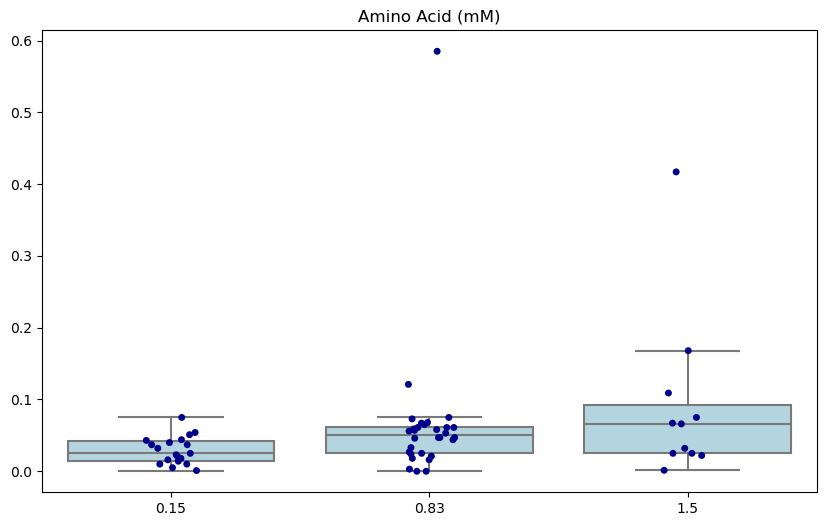

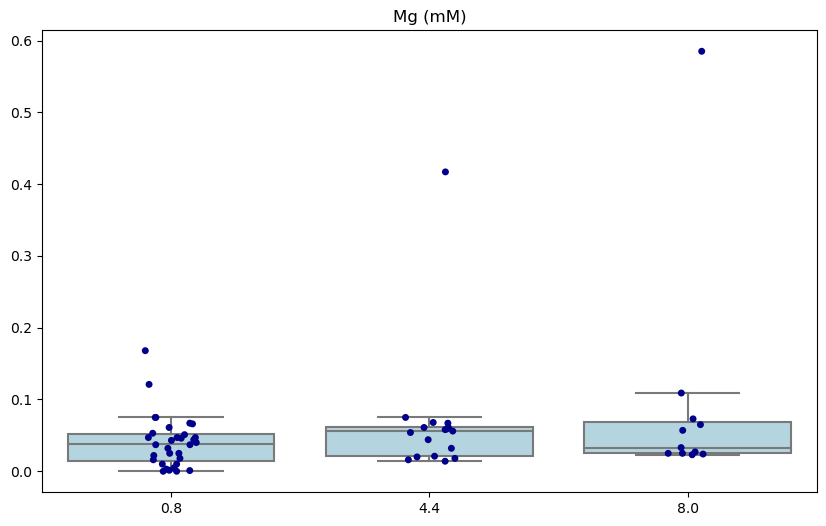

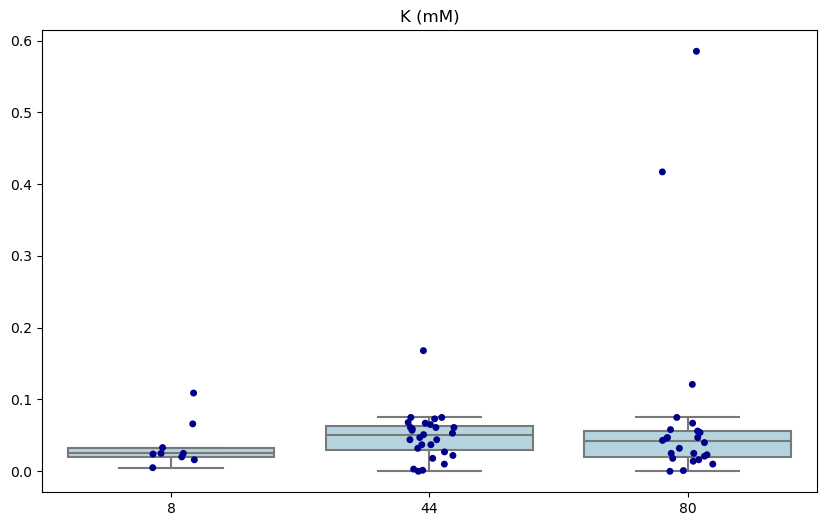

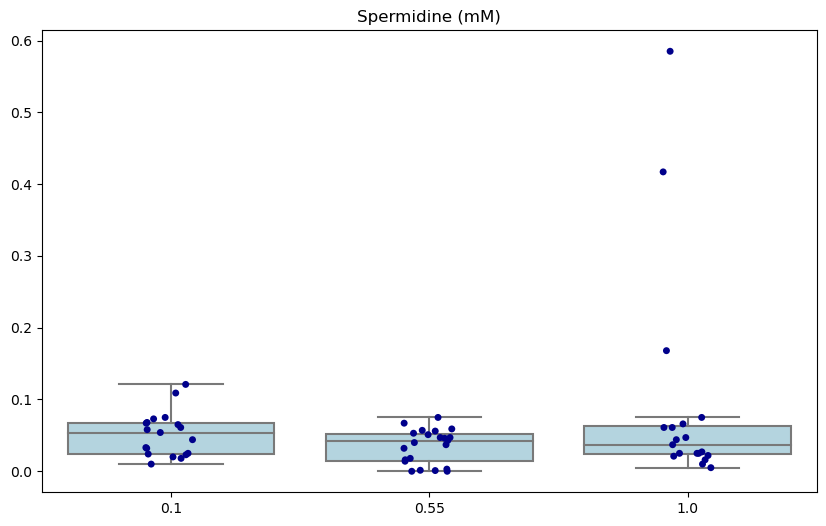

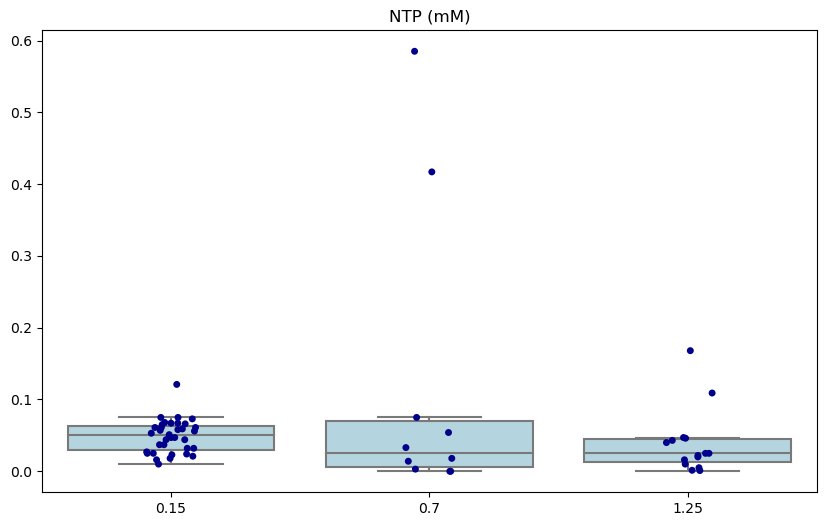

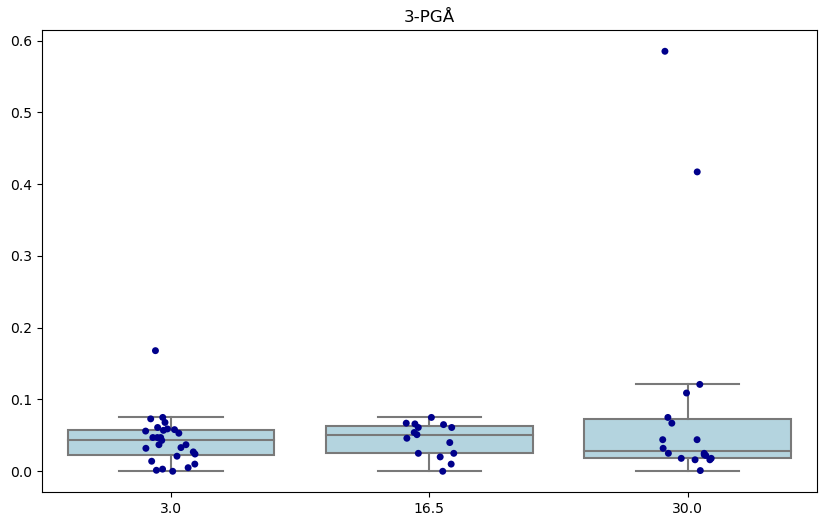

In [118]:
# 実験結果をbox plotとjitter plotでチェックする

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 実験結果のCSVファイルを読み込む
df = pd.read_csv("/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_2.csv")

df = df.drop("Unnamed: 0",axis=1)

# データフレームから辞書に変換
data_dict = df.to_dict(orient='list')


# 特定の化学成分（ここでは"Mg (mM)"）に対するボックスプロットとジッタープロット
plt.figure(figsize=(10, 6))
sns.boxplot(x='アミノ酸(mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='アミノ酸(mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Amino Acid (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Mg (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='Mg (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Mg (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='K (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='K (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('K (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='スペルミジン (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='スペルミジン (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Spermidine (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NTP (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='NTP (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('NTP (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='3-PGÅ', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='3-PGÅ', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('3-PGÅ')
plt.show()

# 各ラウンドごとの収量データを比較する・実験結果をbox plotとjitter plotでチェックする


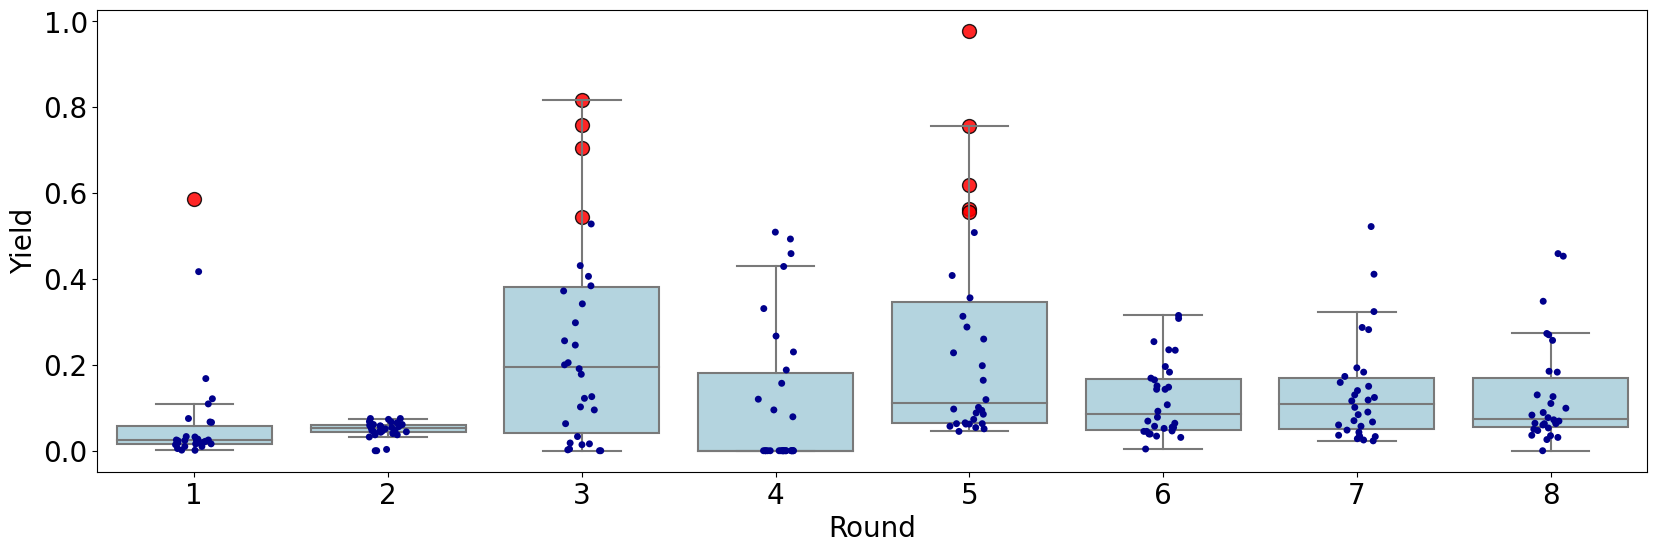

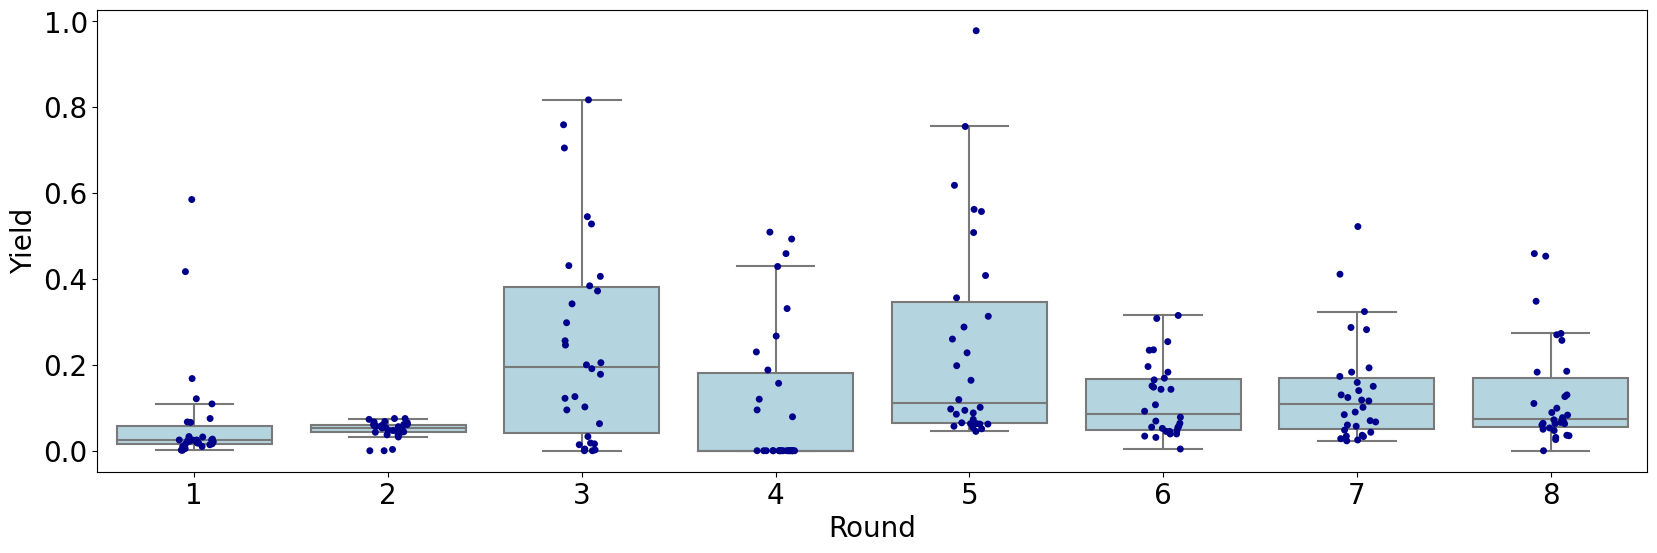

In [1]:
# 各ラウンドごとの収量データを比較する
# 実験結果をbox plotとjitter plotでチェックする

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files = [
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result/result_20231228.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result/result_20240111.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result/result_20240112.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result/result_20240125.csv",
     "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result/result_20240131.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result/result_20240202.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result/result_20240208.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result/result_20240209.csv"
]

# 空のデータフレームを作成
all_data = pd.DataFrame()



# 各ファイルからデータを読み込み、統合する
for i, file in enumerate(files):
    df = pd.read_csv(file)
    df['round'] = f"{i+1}"  # 実験の識別子を追加

    all_data = pd.concat([all_data, df], ignore_index=True)
    

top10 = all_data.nlargest(10, 'Yield')
# トップ10以外のデータを抽出
not_top10 = all_data[~all_data.index.isin(top10.index)]

# ボックスプロット
plt.figure(figsize=(20, 6))
sns.boxplot(x='round', y='Yield', data=all_data, color='lightblue', showfliers=False)

# トップ10以外のデータに対するジッタープロット（青い点）
sns.stripplot(x='round', y='Yield', data=not_top10, color='darkblue', jitter=True)

# トップ10のデータポイントに赤い色をつけてプロット
plt.scatter(top10['round'].astype(int)-1, top10['Yield'], color='red', s=100, edgecolor='black', alpha=0.85)

# plt.title('Amount of expression per each round', fontsize=30, fontweight='bold')
plt.xlabel('Round', fontsize=20)  
plt.ylabel('Yield', fontsize=20)  
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)

plt.show()

# 特定の化学成分（ここでは"Mg (mM)"）に対するボックスプロットとジッタープロット
plt.figure(figsize=(20, 6))
sns.boxplot(x='round', y='Yield', data=all_data, color='lightblue', showfliers=False)
sns.stripplot(x='round', y='Yield', data=all_data, color='darkblue', jitter=True)

# plt.title('Amount of expression per each round', fontsize=30,fontweight='bold')
plt.xlabel('Round', fontsize=20)  
plt.ylabel('Yield', fontsize=20)  
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20) 

plt.show()

# mutual information analysis(相互情報量分析)

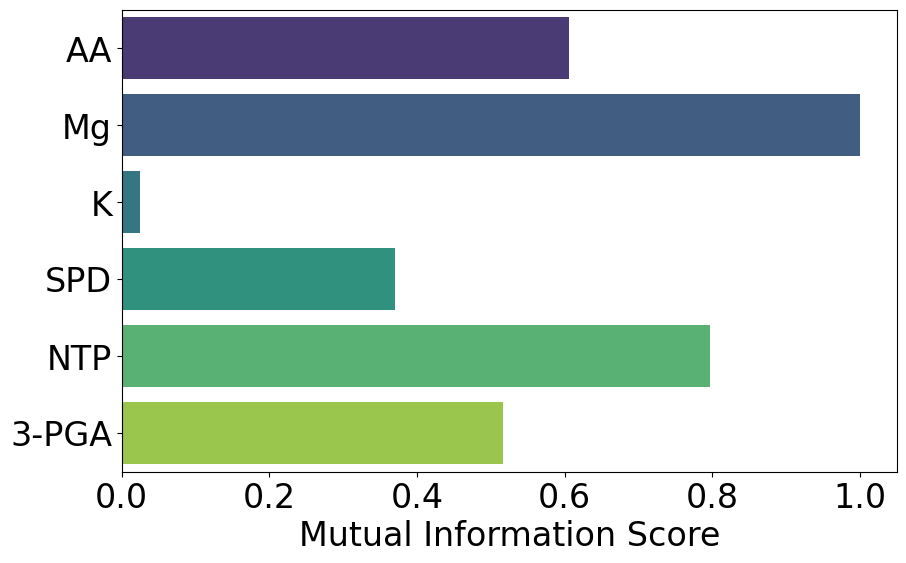

In [39]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  実験結果データの読み込み
data = pd.read_csv('./../data/result_2.csv')

# 列の名前を英語に変更
data.columns = ['Index', 'Yield', 'AA', 'Mg', 'K', 'SPD', 'NTP', '3-PGA']

# 目的変数（Yield）と説明変数（他の全ての列）に分割
X = data.drop(['Index', 'Yield'], axis=1)
y = data['Yield']

# 相互情報量の計算
mi = mutual_info_regression(X, y,random_state=0)
mi /= np.max(mi)  # 正規化

# 結果の表示
mi_result = pd.Series(mi, index=X.columns)
mi_result.sort_values(ascending=False)


# 結果の可視化
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_result.values, y=mi_result.index, palette="viridis")
# plt.title('溶液の濃度と発現量の相互情報解析', fontsize=20,fontweight='bold')
plt.xlabel('Mutual Information Score', fontsize=24)
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)

plt.show()

# 実際のデータを使った発現量(昇順)のプロットとそれに対応した濃度組成のheat map

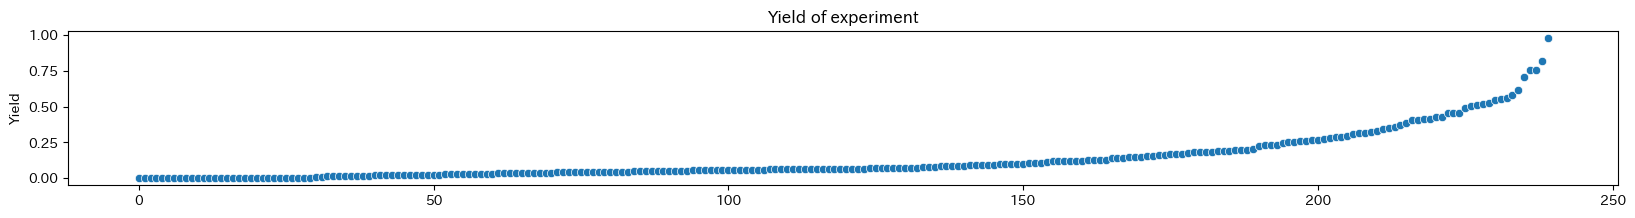

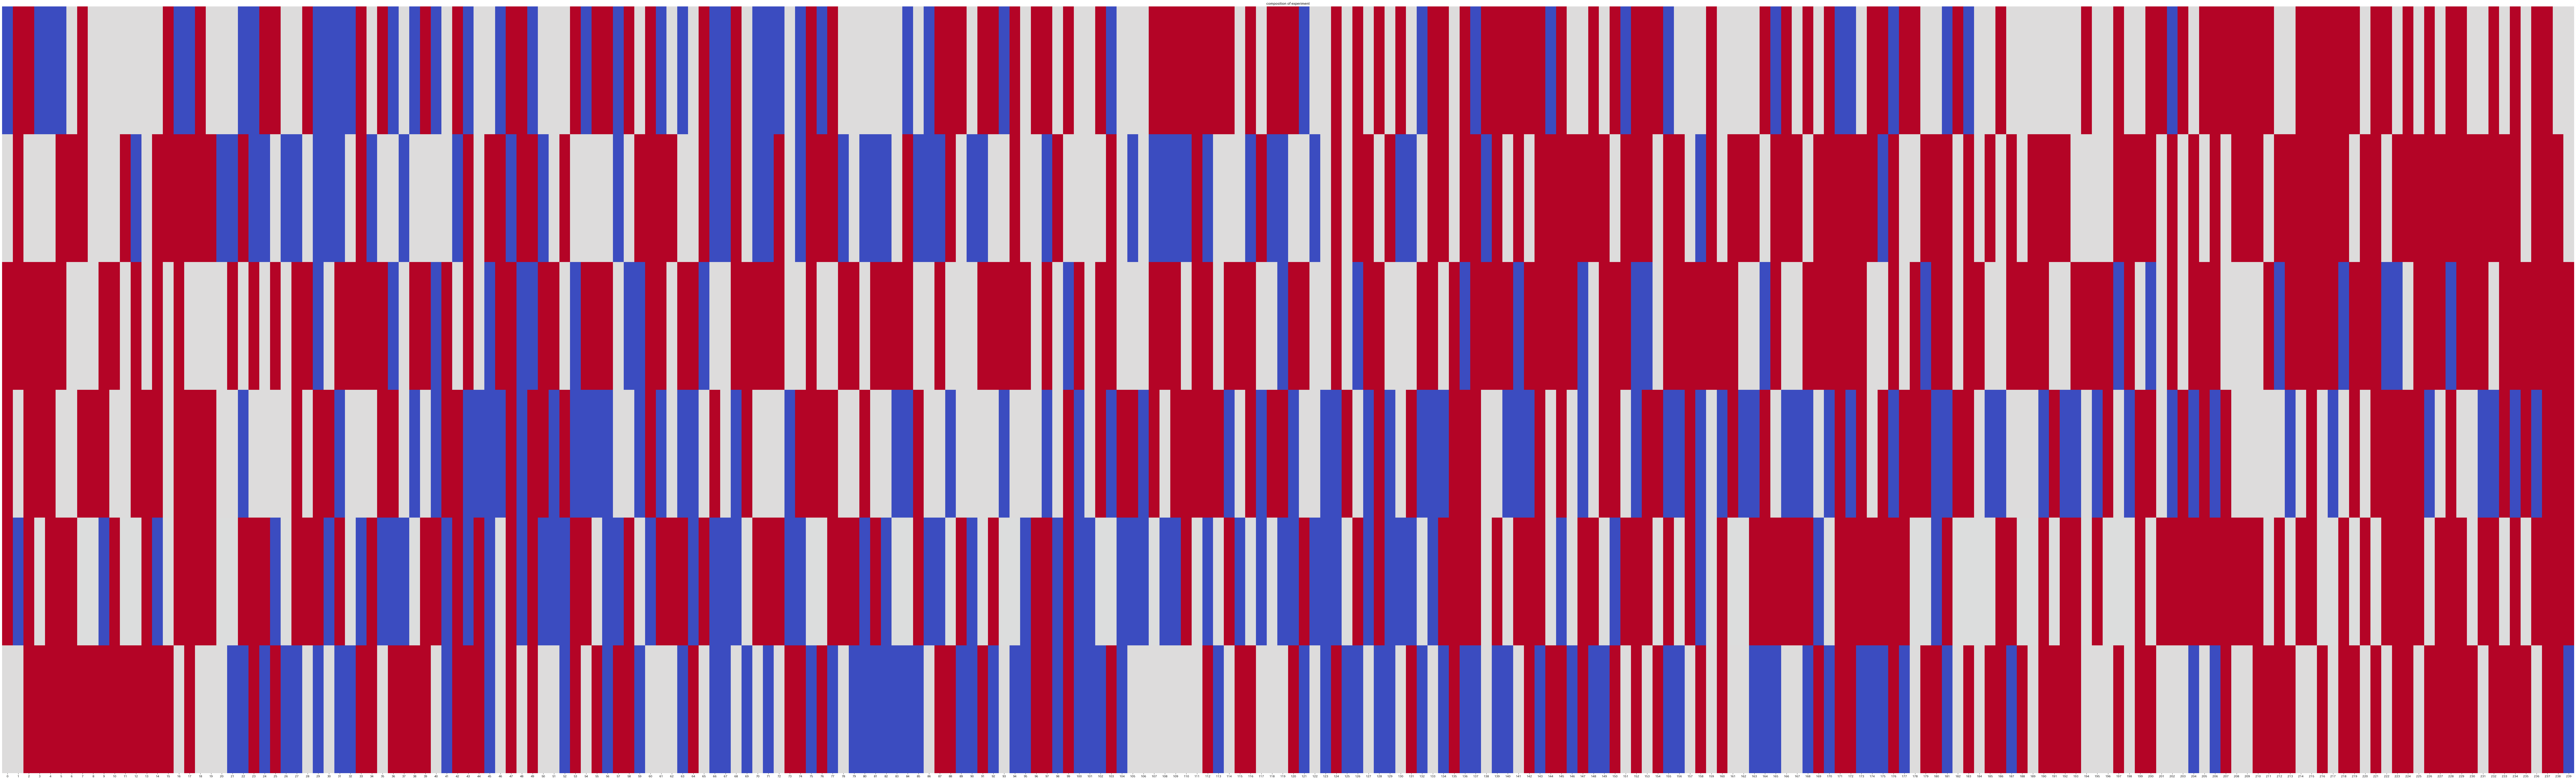

In [16]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  実験結果データの読み込み
data = pd.read_csv('./../data/result_2.csv')

sorted_data = data.sort_values('Yield', ascending=True, ignore_index=True)

# 散布図の作成
plt.figure(figsize=(20, 2))
sns.scatterplot(x=sorted_data.index, y='Yield', data=sorted_data)
plt.title('Yield of experiment')
plt.ylabel('Yield')

# heat mapを作成する
heatmap_data = sorted_data[['AA(mM)', 'Mg (mM)', 'K (mM)', 'SPD (mM)', 'NTP (mM)', '3-PGÅ']]

# Creating the heatmap
# Normalize data within each column for the heatmap
normalized_data = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Creating the heatmap with normalized data
plt.figure(figsize=(160, 48))
sns.heatmap(normalized_data.T, cmap='coolwarm', annot=False, cbar=False,yticklabels=False)
plt.title('composition of experiment')


plt.show()


#  予測値のデータを使った発現量(昇順)のプロット

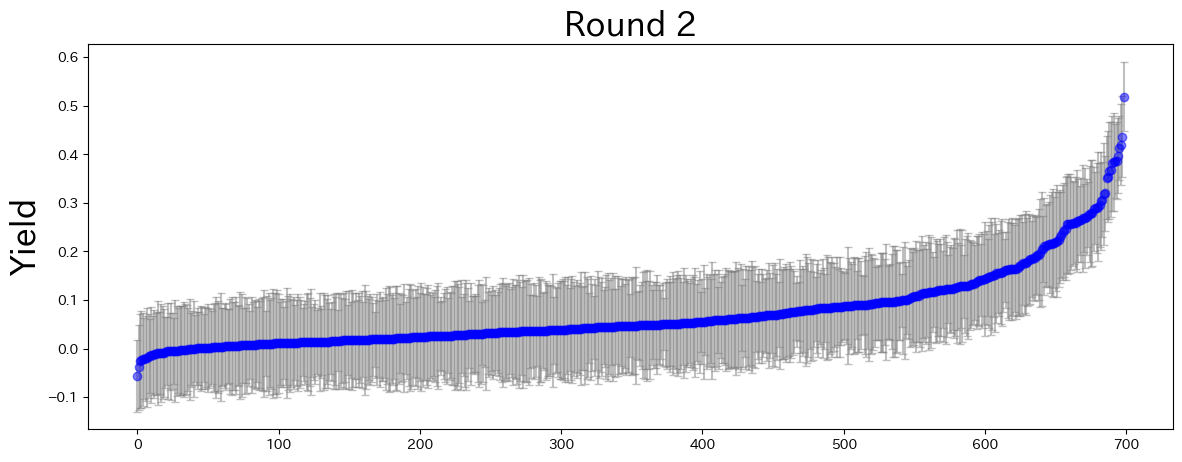

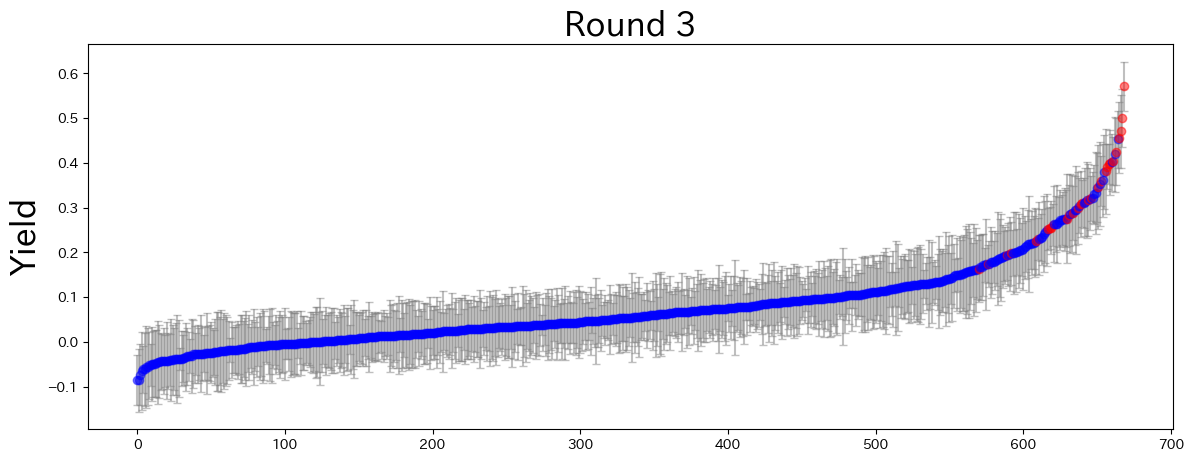

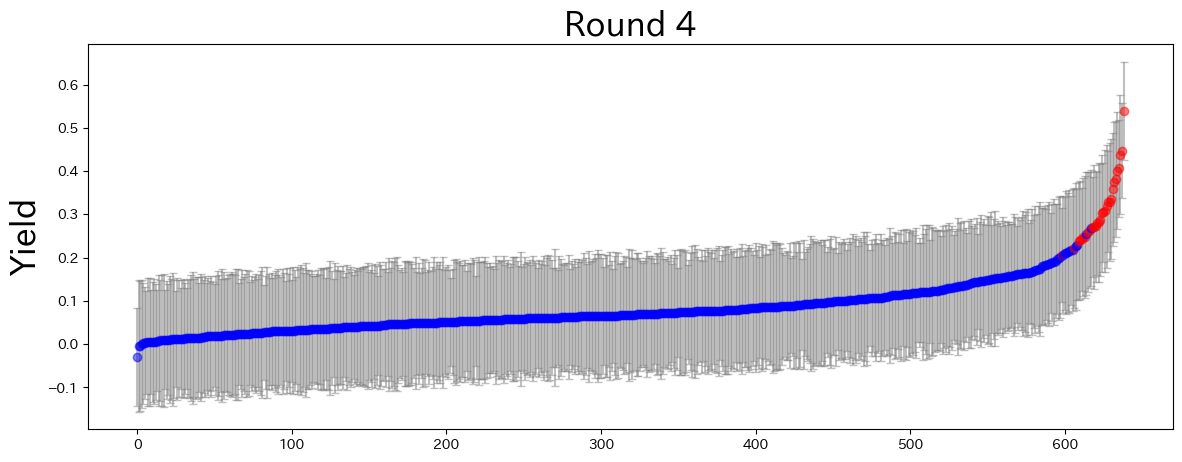

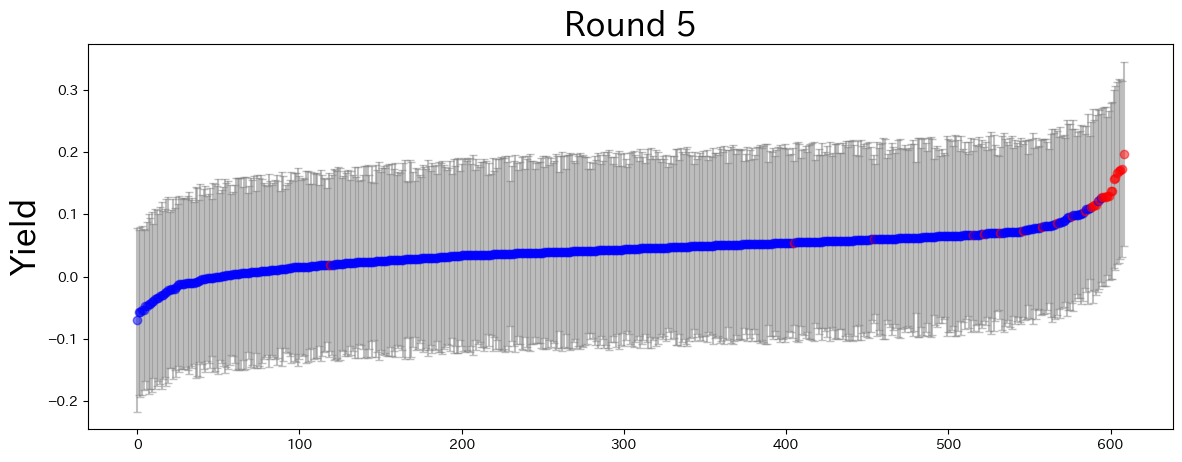

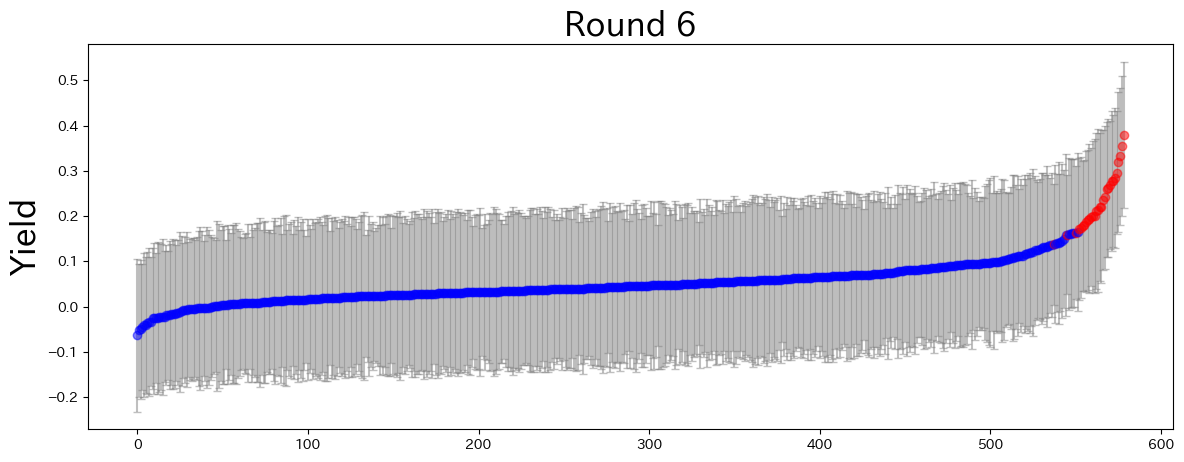

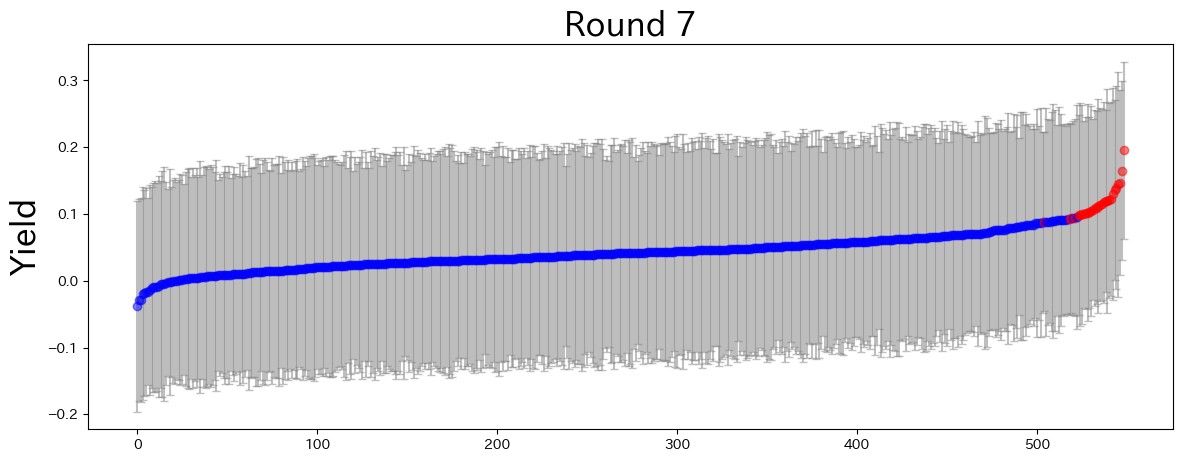

In [36]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

predictions = [
    './../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-01-11-2.csv',
    './../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-01-12-2.csv',
    './../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-01-25.csv',
    './../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-01-31.csv',
    './../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-02-02.csv',
    './../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-02-08.csv'
]

stds = [
    './../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-01-11-2.csv',
    './../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-01-12-2.csv',
    './../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-01-25.csv',
    './../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-01-31.csv',
    './../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-02-02.csv',
    './../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-02-08.csv'
]

next_samples = [
    './../data/next_samples/next_samples_bo_2024-01-11-2.csv',
    './../data/next_samples/next_samples_bo_2024-01-12.csv',
    './../data/next_samples/next_samples_bo_2024-01-25.csv',
    './../data/next_samples/next_samples_bo_2024-01-31.csv',
    './../data/next_samples/next_samples_bo_2024-02-02.csv',
    './../data/next_samples/next_samples_bo_2024-02-08.csv'
]

# for i, _ in enumerate(predictions):
# #  実験結果データの読み込み
#     prediction = pd.read_csv(predictions[i])
#     std = pd.read_csv(stds[i])
#     remaining_samplse = pd.read_csv(f'./../data/remaining_samples/remaining_samples_{i+1}.csv')

#     data = pd.merge(prediction,std)
#     data = pd.merge(data,remaining_samplse)

#     sorted_data = data.sort_values('estimated_y', ascending=True, ignore_index=True)

#     # 散布図の作成
#     plt.figure(figsize=(14, 5))
#     plt.errorbar(x=sorted_data.index, y=sorted_data['estimated_y'], yerr=sorted_data['std_of_estimated_y'], fmt='o', ecolor='gray', alpha=0.5, capsize=3)
#     plt.title(f'Round{i+2}')
#     plt.ylabel('Yield')

#     # heat mapを作成する
#     # Define concentration levels
#     concentration_levels = {
#         'AA(mM)': [1.5, 0.83, 0.15],
#         'Mg (mM)': [8, 4.4, 0.8],
#         'K (mM)': [80, 44, 8],
#         'SPD (mM)': [1, 0.55, 0.1],
#         'NTP (mM)': [1.25, 0.7, 0.15],
#         '3-PGÅ': [30, 16.5, 3]
#     }

#     # Define color mapping
#     color_mapping = {0: '#8B0000', 1: 'white', 2: 'blue'} 

#     heatmap_data = sorted_data[['AA(mM)', 'Mg (mM)', 'K (mM)', 'SPD (mM)', 'NTP (mM)', '3-PGÅ']]

#     categorized_data = heatmap_data.copy()
#     for col in categorized_data.columns:
#         categorized_data[col] = categorized_data[col].apply(lambda x: concentration_levels[col].index(x))

#     # Create the heatmap with categorized data
#     plt.figure(figsize=(14, 5))
#     sns.heatmap(categorized_data.T, cmap=sns.color_palette([color_mapping[i] for i in range(3)]), annot=False, cbar=False)
#     plt.title(f'Composition of experiment round{i+2}')
#     plt.show()


for i, prediction_path in enumerate(predictions):
    # 実験結果データの読み込み
    prediction = pd.read_csv(prediction_path)
    std = pd.read_csv(stds[i])
    next_sample = pd.read_csv(next_samples[i])
    remaining_samples = pd.read_csv(f'./../data/remaining_samples/remaining_samples_{i+1}.csv')

    # ID列を基にデータをマージする
    data = pd.merge(prediction, std, on='id')
    data = pd.merge(data, remaining_samples, on='id')

    # next_samplesに含まれるIDを取得
    next_sample_ids = next_sample['id'].tolist()

    sorted_data = data.sort_values('estimated_y', ascending=True, ignore_index=True)

    # 散布図の作成
    plt.figure(figsize=(14, 5))
    for index, row in sorted_data.iterrows():
        # next_samplesに含まれるIDかどうかに基づいて色を決定
        color = 'red' if row['id'] in next_sample_ids else 'blue'
        plt.errorbar(x=index, y=row['estimated_y'], yerr=row['std_of_estimated_y'], fmt='o', ecolor='gray', color=color, alpha=0.5, capsize=3)

    plt.title(f'Round {i+2}', fontsize=24)
    plt.ylabel('Yield', fontsize=24)
    plt.show()


Round4の予測値

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  実験結果データの読み込み
prediction = pd.read_csv('./../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-01-11-2.csv')
std = pd.read_csv('./../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-01-11-2.csv')

data = pd.merge(prediction,std)

sorted_data = data.sort_values('estimated_y', ascending=True, ignore_index=True)
print(sorted_data)

# 散布図の作成
plt.figure(figsize=(14, 5))
plt.errorbar(x=sorted_data.index, y=sorted_data['estimated_y'], yerr=sorted_data['std_of_estimated_y'], fmt='o', ecolor='gray', alpha=0.5, capsize=3)
plt.title('Yield of experiment')
plt.ylabel('Yield')

# # heat mapを作成する
# heatmap_data = sorted_data[['AA(mM)', 'Mg (mM)', 'K (mM)', 'SPD (mM)', 'NTP (mM)', '3-PGÅ']]

# # Creating the heatmap
# # Normalize data within each column for the heatmap
# normalized_data = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# # Creating the heatmap with normalized data
# plt.figure(figsize=(14, 5))
# sns.heatmap(normalized_data.T, cmap='coolwarm', annot=False, cbar=False)
# plt.title('composition of experiment')

plt.show()


Round5の予測値

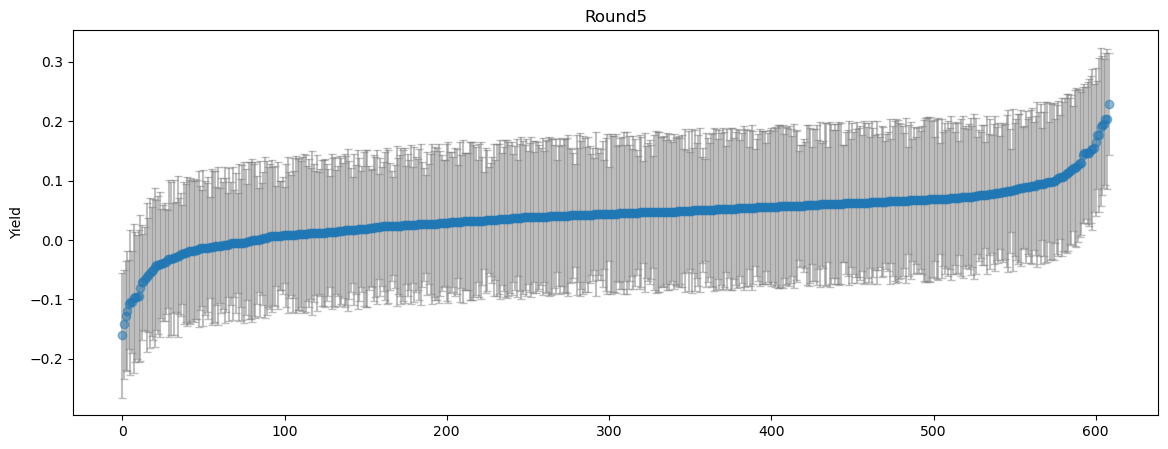

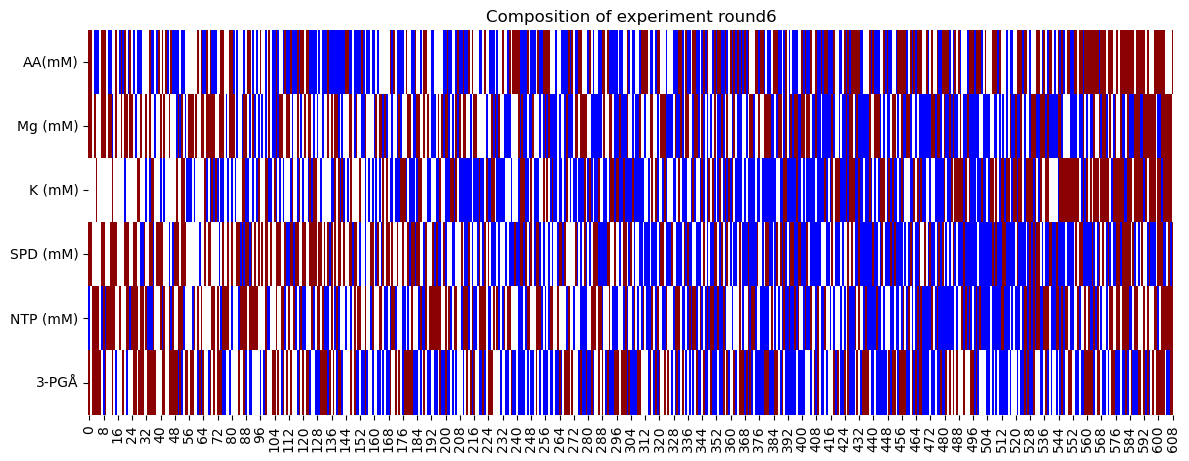

In [222]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  実験結果データの読み込み
prediction = pd.read_csv('./../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-01-31.csv')
std = pd.read_csv('./../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-01-31.csv')
remaining_samplse = pd.read_csv('./../data/remaining_samples_4.csv')

data = pd.merge(prediction,std)
data = pd.merge(data,remaining_samplse)

sorted_data = data.sort_values('estimated_y', ascending=True, ignore_index=True)

# 散布図の作成
plt.figure(figsize=(14, 5))
plt.errorbar(x=sorted_data.index, y=sorted_data['estimated_y'], yerr=sorted_data['std_of_estimated_y'], fmt='o', ecolor='gray', alpha=0.5, capsize=3)
plt.title('Round5')
plt.ylabel('Yield')

# heat mapを作成する
# Define concentration levels
concentration_levels = {
    'AA(mM)': [1.5, 0.83, 0.15],
    'Mg (mM)': [8, 4.4, 0.8],
    'K (mM)': [80, 44, 8],
    'SPD (mM)': [1, 0.55, 0.1],
    'NTP (mM)': [1.25, 0.7, 0.15],
    '3-PGÅ': [30, 16.5, 3]
}

# Define color mapping
color_mapping = {0: '#8B0000', 1: 'white', 2: 'blue'} 

heatmap_data = sorted_data[['AA(mM)', 'Mg (mM)', 'K (mM)', 'SPD (mM)', 'NTP (mM)', '3-PGÅ']]

categorized_data = heatmap_data.copy()
for col in categorized_data.columns:
    categorized_data[col] = categorized_data[col].apply(lambda x: concentration_levels[col].index(x))

# Create the heatmap with categorized data
plt.figure(figsize=(14, 5))
sns.heatmap(categorized_data.T, cmap=sns.color_palette([color_mapping[i] for i in range(3)]), annot=False, cbar=False)
plt.title(f'Composition of experiment round6')
plt.show()



round6予測値

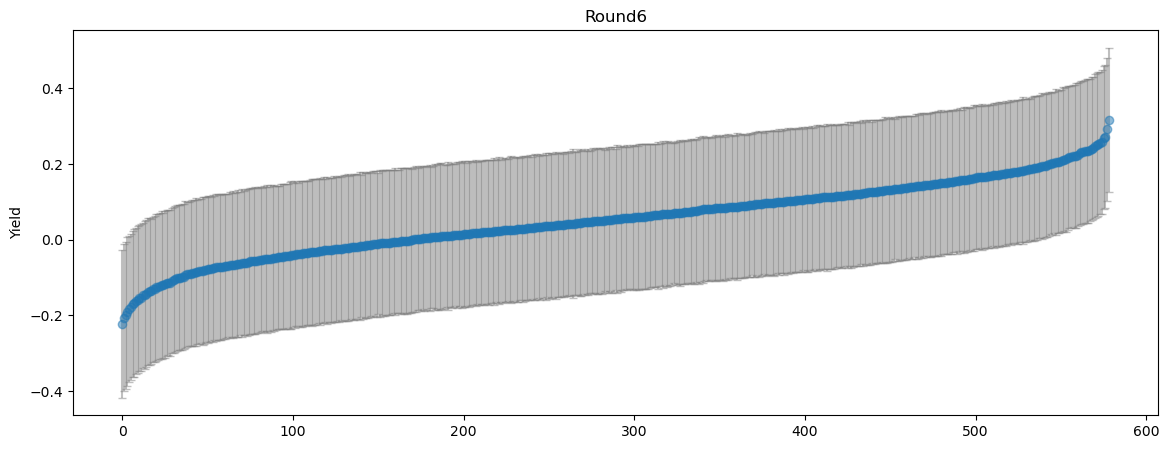

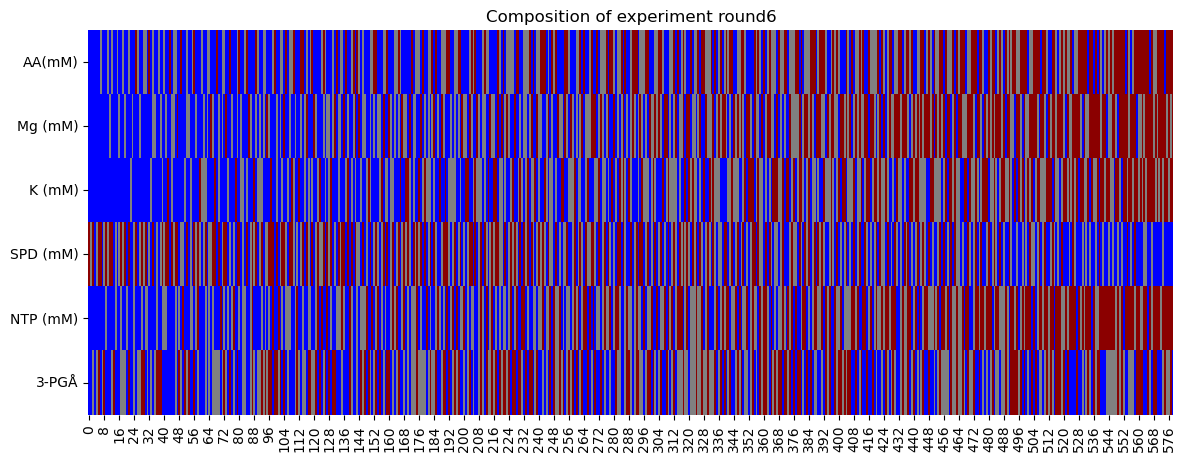

In [218]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  実験結果データの読み込み
prediction = pd.read_csv('./../data/estimated_y_prediction_gpr_one_kernel/estimated_y_prediction_gpr_one_kernel_2024-02-02.csv')
std = pd.read_csv('./../data/estimated_y_prediction_gpr_one_kernel_std/estimated_y_prediction_gpr_one_kernel_std_2024-02-02.csv')
remaining_samplse = pd.read_csv('./../data/remaining_samples_5.csv')

data = pd.merge(prediction,std)
data = pd.merge(data,remaining_samplse)

sorted_data = data.sort_values('estimated_y', ascending=True, ignore_index=True)

# 散布図の作成
plt.figure(figsize=(14, 5))
plt.errorbar(x=sorted_data.index, y=sorted_data['estimated_y'], yerr=sorted_data['std_of_estimated_y'], fmt='o', ecolor='gray', alpha=0.5, capsize=3)
plt.title('Round6')
plt.ylabel('Yield')

# heat mapを作成する


# Define concentration levels
concentration_levels = {
    'AA(mM)': [1.5, 0.83, 0.15],
    'Mg (mM)': [8, 4.4, 0.8],
    'K (mM)': [80, 44, 8],
    'SPD (mM)': [1, 0.55, 0.1],
    'NTP (mM)': [1.25, 0.7, 0.15],
    '3-PGÅ': [30, 16.5, 3]
}

# Define color mapping
color_mapping = {0: '#8B0000', 1: 'grey', 2: 'blue'} 

heatmap_data = sorted_data[['AA(mM)', 'Mg (mM)', 'K (mM)', 'SPD (mM)', 'NTP (mM)', '3-PGÅ']]

categorized_data = heatmap_data.copy()
for col in categorized_data.columns:
    categorized_data[col] = categorized_data[col].apply(lambda x: concentration_levels[col].index(x))

# Create the heatmap with categorized data
plt.figure(figsize=(14, 5))
sns.heatmap(categorized_data.T, cmap=sns.color_palette([color_mapping[i] for i in range(3)]), annot=False, cbar=False)
plt.title(f'Composition of experiment round6')
plt.show()


# 実験ごとのheat map

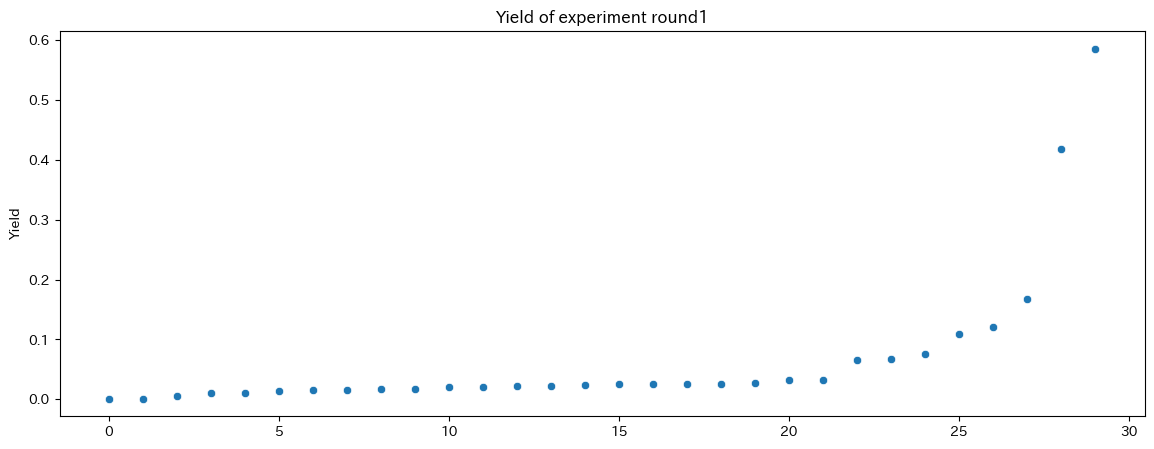

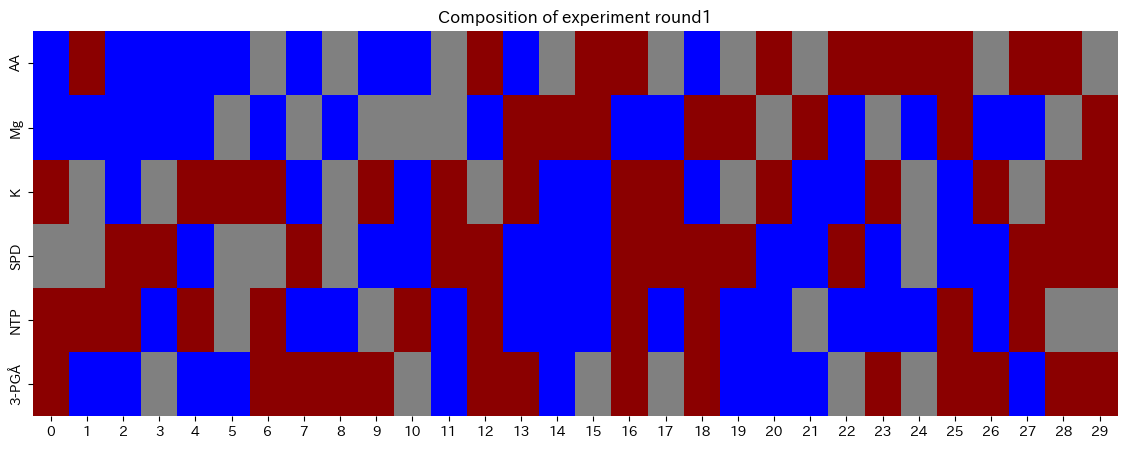

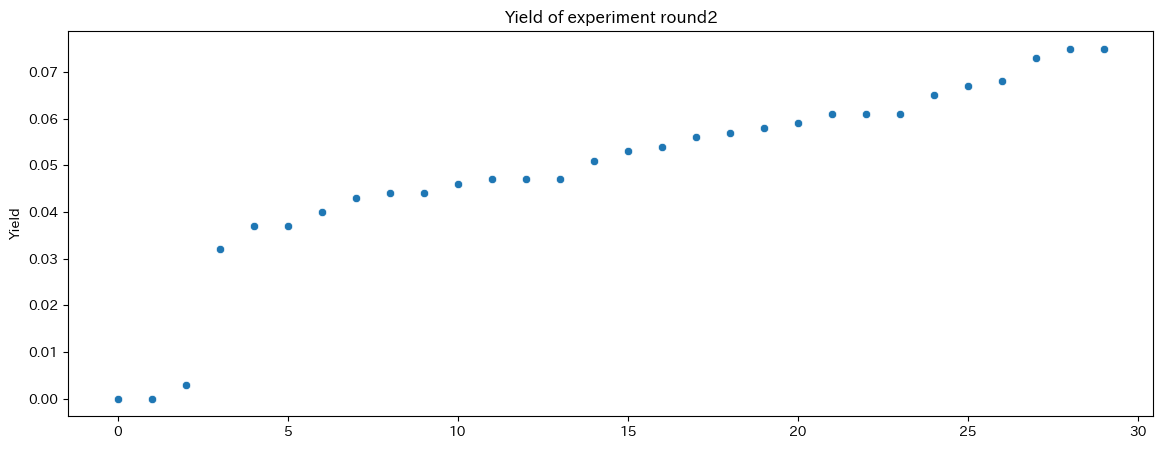

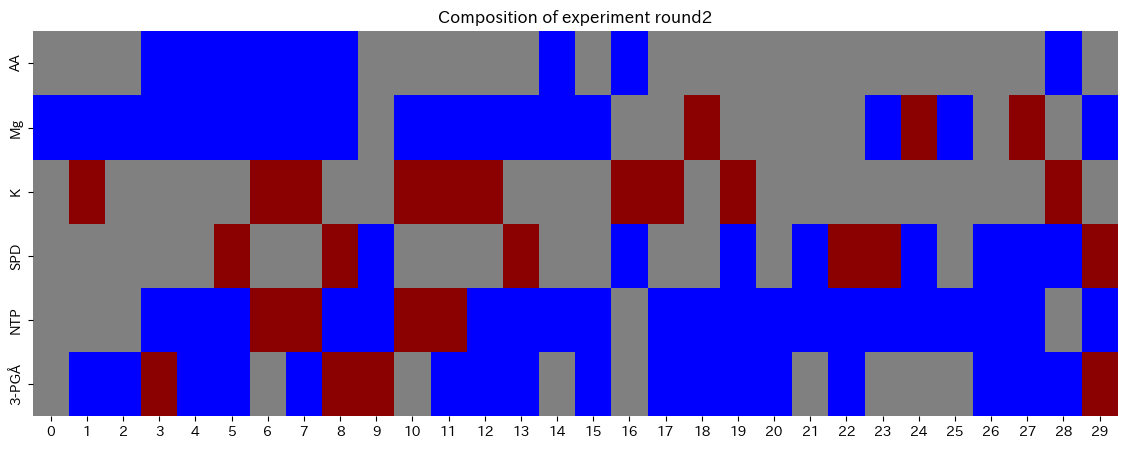

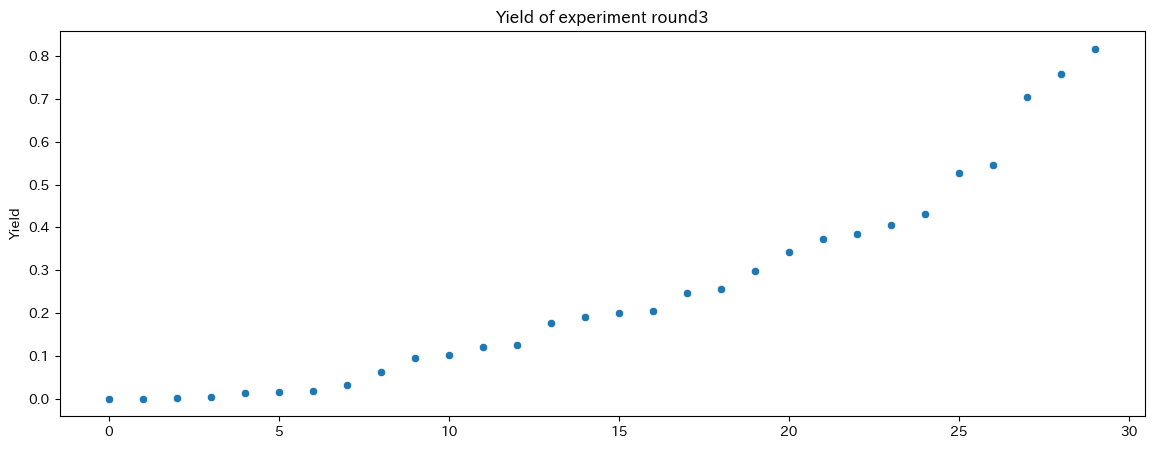

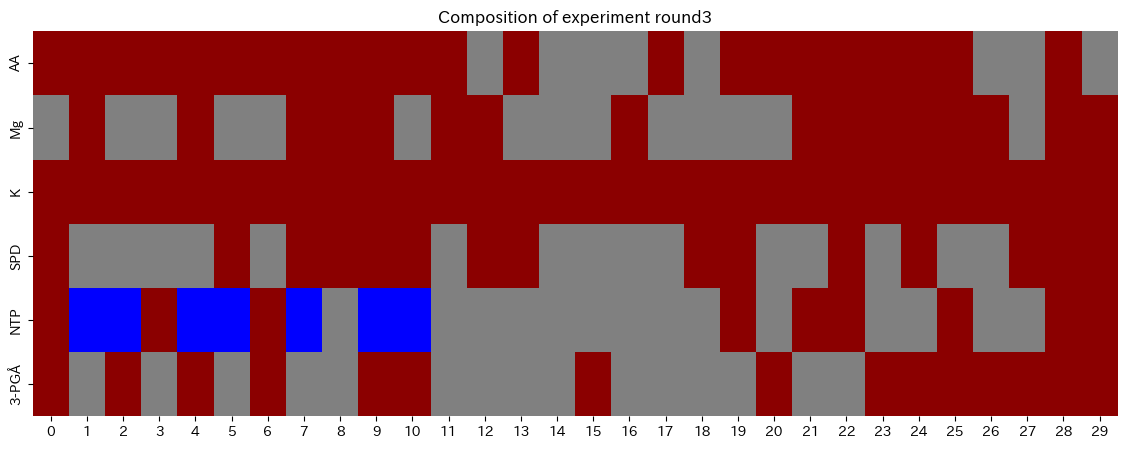

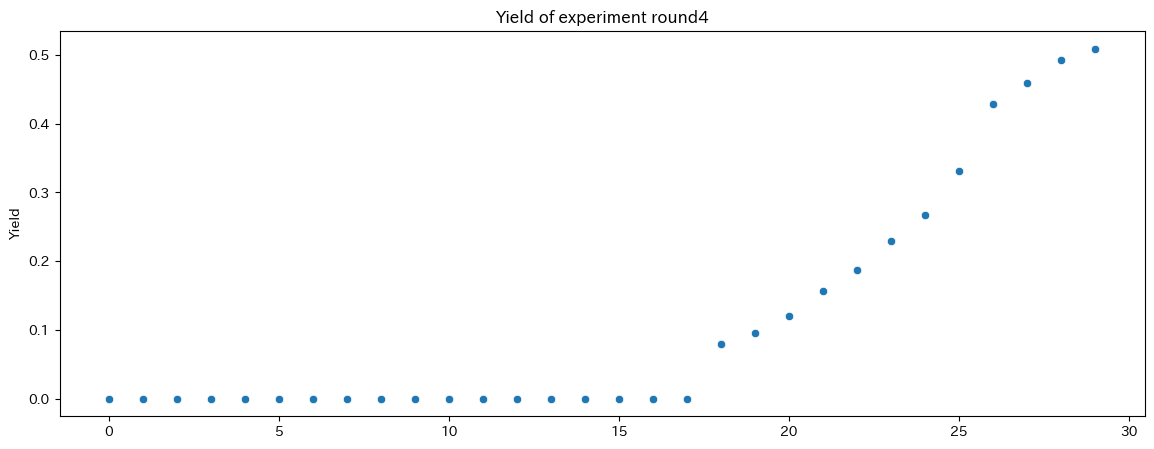

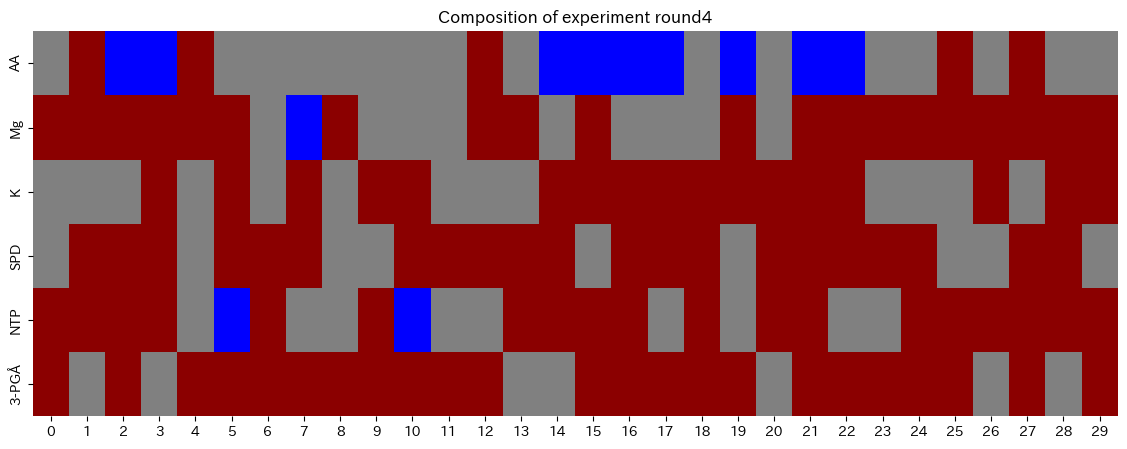

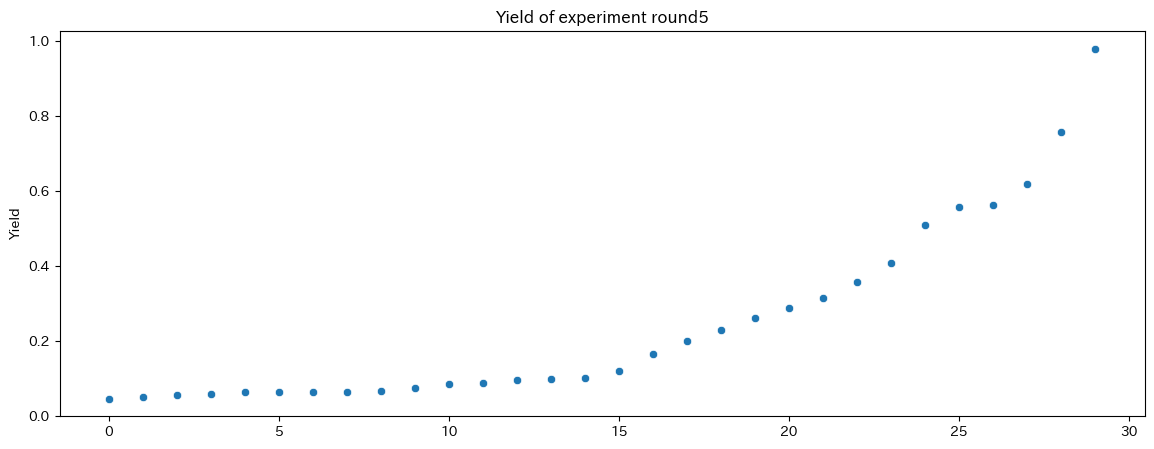

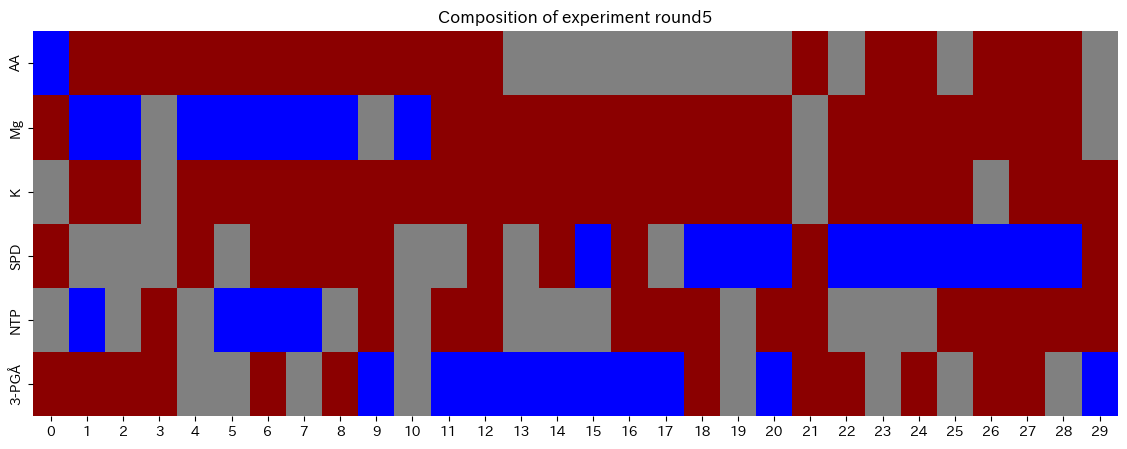

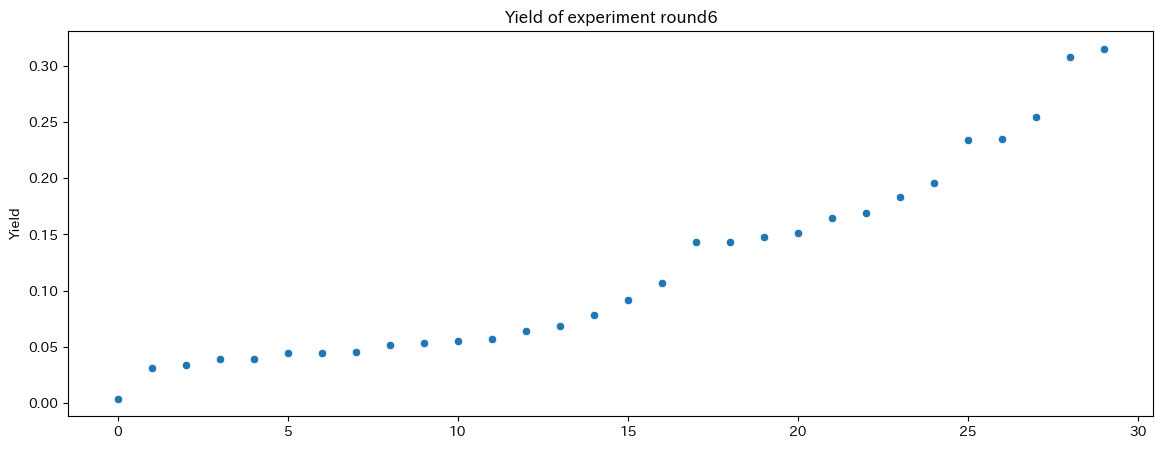

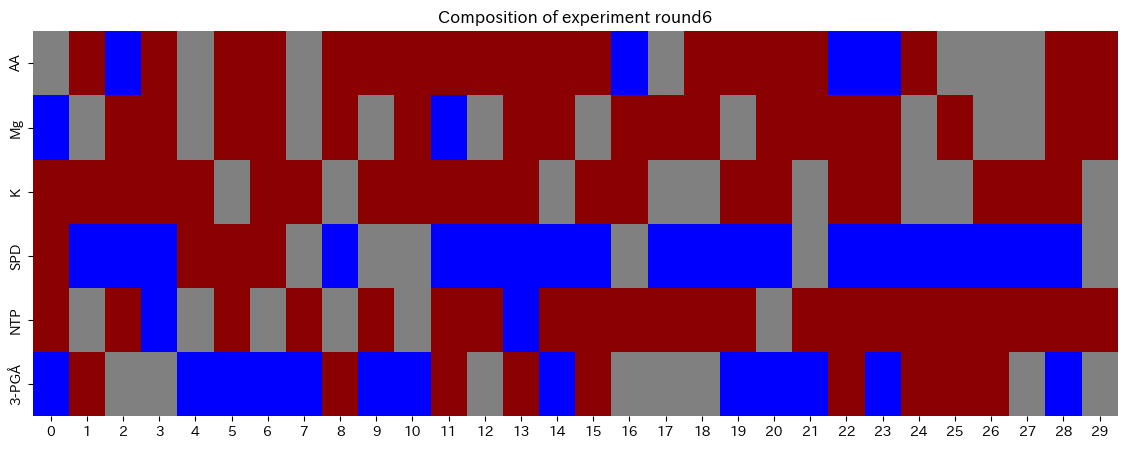

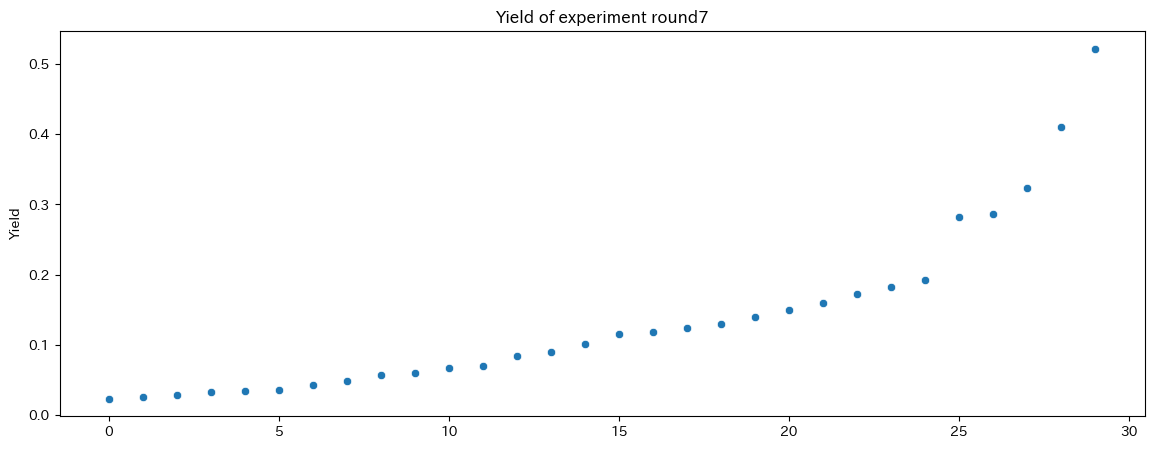

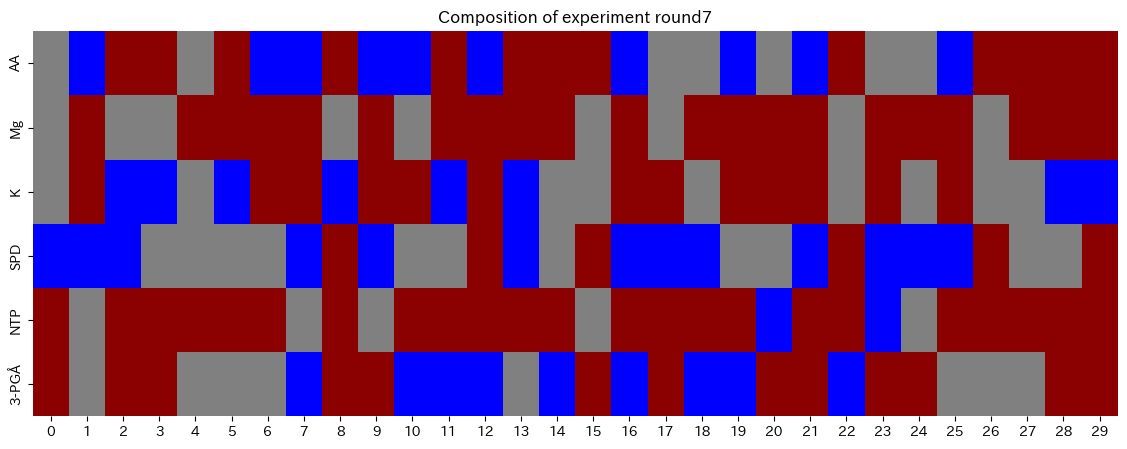

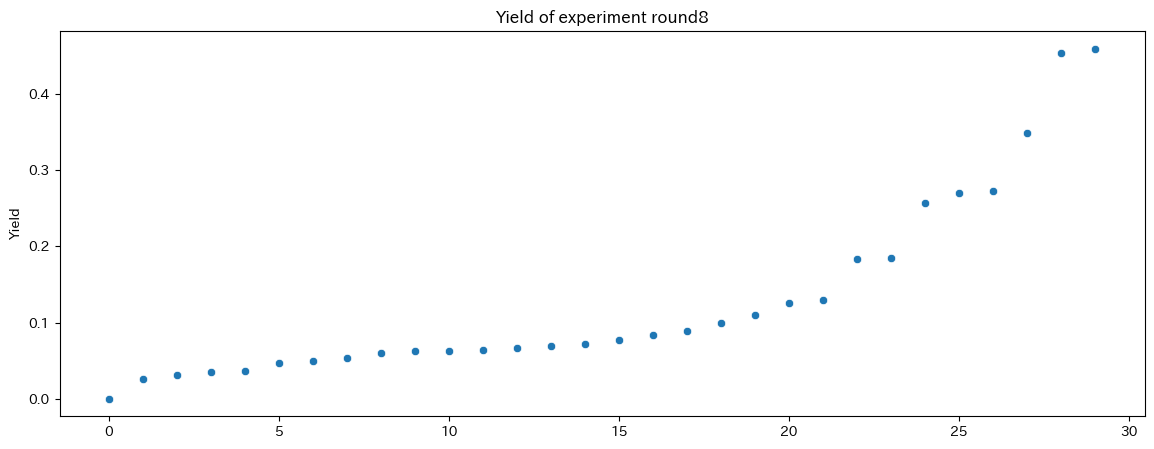

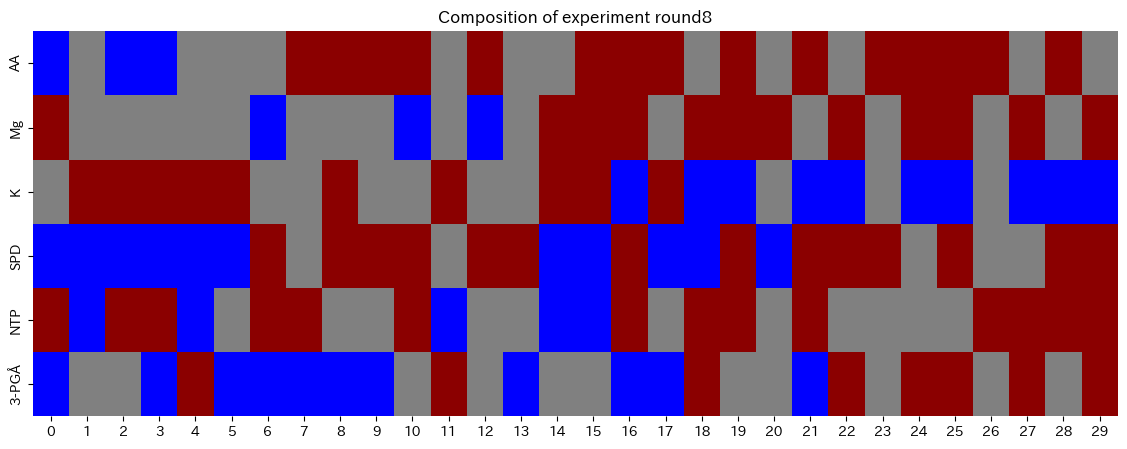

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

results = [
    './../data/result/result_20231228.csv',
    './../data/result/result_20240111.csv',
    './../data/result/result_20240112.csv',
    './../data/result/result_20240125.csv',
    './../data/result/result_20240131.csv',
    './../data/result/result_20240202.csv',
    './../data/result/result_20240208.csv',
    './../data/result/result_20240209.csv'
]

# Define concentration levels
concentration_levels = {
    'AA': [1.5, 0.83, 0.15],
    'Mg': [8, 4.4, 0.8],
    'K': [80, 44, 8],
    'SPD': [1, 0.55, 0.1],
    'NTP': [1.25, 0.7, 0.15],
    '3-PGÅ': [30, 16.5, 3]
}

# Define color mapping
color_mapping = {0: '#8B0000', 1: 'grey', 2: 'blue'} 

for i, result in enumerate(results):
    next_samples = pd.read_csv(result)
    sorted_data = next_samples.sort_values('Yield', ascending=True, ignore_index=True)

    # Scatter plot
    plt.figure(figsize=(14, 5))
    sns.scatterplot(x=sorted_data.index, y='Yield', data=sorted_data)
    plt.title(f'Yield of experiment round{i+1}')
    plt.ylabel('Yield')

    # Heatmap data
    heatmap_data = sorted_data[['AA', 'Mg', 'K', 'SPD', 'NTP', '3-PGÅ']]
    
    # Categorize the concentrations
    categorized_data = heatmap_data.copy()
    for col in categorized_data.columns:
        categorized_data[col] = categorized_data[col].apply(lambda x: concentration_levels[col].index(x))

    # Create the heatmap with categorized data
    plt.figure(figsize=(14, 5))
    sns.heatmap(categorized_data.T, cmap=sns.color_palette([color_mapping[i] for i in range(3)]), annot=False, cbar=False)
    plt.title(f'Composition of experiment round{i+1}')
    plt.show()


# モンテカルロ法によるシミュレーション

In [50]:
# 729 条件から30条件ずつ選択しこれを1ラウンドとする。この時、特定の10個の値は何ラウンドまでに出ると予測さ予測されるか。ラウンドごとに選ばれた値は消えていく。
def monte_carlo_simulation_with_removal(total_conditions, selection_per_round, specific_values, simulations):
    rounds_to_complete = []
    
    for _ in range(simulations):
        available_conditions = np.arange(total_conditions)  # すべての条件が選択可能
        selected_specific_values = set()  # 選択された特定の値
        rounds = 0
        
        while len(selected_specific_values) < specific_values:
            if len(available_conditions) < selection_per_round:  # 残り条件が選択数未満の場合
                break  # このシナリオでは完了不可能
            chosen = np.random.choice(available_conditions, selection_per_round, replace=False)
            selected_specific_values.update(set(chosen[chosen < specific_values]))  # 特定の値の選択を確認
            rounds += 1
            
            # 選択された条件を次ラウンドから除外
            available_conditions = np.array(list(set(available_conditions) - set(chosen)))
        
        if len(selected_specific_values) == specific_values:
            rounds_to_complete.append(rounds)
    
    if rounds_to_complete:  # 完了できたシミュレーションがある場合のみ平均を計算
        average_rounds = np.mean(rounds_to_complete)
    else:
        average_rounds = None  # 全ての値が選択されないシナリオ
    
    return average_rounds

# 修正したシミュレーションの実行
average_rounds_with_729 = monte_carlo_simulation_with_removal(total_conditions=729, selection_per_round=30, specific_values=10, simulations=10000)
average_rounds_with_240 = monte_carlo_simulation_with_removal(total_conditions=240, selection_per_round=30, specific_values=10, simulations=10000)

print(f'729条件から10個の特定の値が選択されるまでの平均ラウンド数: {average_rounds_with_729}')
print(f'320条件から10個の特定の値が選択されるまでの平均ラウンド数: {average_rounds_with_240}')


729条件から10個の特定の値が選択されるまでの平均ラウンド数: 22.315060719555103
320条件から10個の特定の値が選択されるまでの平均ラウンド数: 7.671


# japanese_matplotlibのインストール

In [ ]:
!pip install japanize_matplotlib
